In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import densenet
from tensorflow.keras import applications
from tensorflow.keras import optimizers

In [3]:
img_width, img_height = 224, 224
train_data_dir = r'D:\Code\Project-ML\Image_Classification\Dataset\train'
validation_data_dir = r'D:\Code\Project-ML\Image_Classification\Dataset\test'

In [4]:
model = applications.DenseNet201(weights = 'imagenet',
                                include_top=False,
                                input_shape = (img_width, img_height, 3))

In [5]:
for layer in model.layers[:6]:
    layer.trainable = True

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

In [7]:
model_final = Model(inputs = model.input, outputs= predictions)

In [8]:
model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range=0.3,
                                   rotation_range=30)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_height, 
                                                                   img_width),
                                                    batch_size = 32, 
                                                    class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size = (img_height, 
                                                                   img_width),
                                                    class_mode = "categorical")

Found 8048 images belonging to 2 classes.
Found 1637 images belonging to 2 classes.


In [11]:
checkpoint = ModelCheckpoint(r"D:\Code\Project-ML\Image_Classification\Save_Model_h5\transfer_fish_plasticwaste_densnet201.h5", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq=1)
early = EarlyStopping(monitor='val_loss', 
                      min_delta=0.001, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

In [12]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [13]:
import datetime
t0 = datetime.datetime.now()
print(t0)

2023-04-25 05:21:48.187093


In [14]:
history = model_final.fit(train_generator, 
                          epochs=100,
                          validation_data = validation_generator,
                          verbose = 1,
                          callbacks = [checkpoint, early])

Epoch 1/100
252/252 [==============================] - 259s 860ms/step - loss: 0.1888 - accuracy: 0.9165 - val_loss: 0.0219 - val_accuracy: 0.9927
Epoch 2/100
252/252 [==============================] - 198s 784ms/step - loss: 0.0782 - accuracy: 0.9739 - val_loss: 0.0210 - val_accuracy: 0.9921
Epoch 3/100
252/252 [==============================] - 198s 782ms/step - loss: 0.0601 - accuracy: 0.9791 - val_loss: 0.0166 - val_accuracy: 0.9945
Epoch 4/100
252/252 [==============================] - 198s 785ms/step - loss: 0.0570 - accuracy: 0.9780 - val_loss: 0.0118 - val_accuracy: 0.9969
Epoch 5/100
252/252 [==============================] - 198s 783ms/step - loss: 0.0385 - accuracy: 0.9852 - val_loss: 0.0103 - val_accuracy: 0.9982
Epoch 6/100
252/252 [==============================] - 198s 784ms/step - loss: 0.0436 - accuracy: 0.9843 - val_loss: 0.0165 - val_accuracy: 0.9951
Epoch 7/100
252/252 [==============================] - 198s 785ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0

In [15]:
t1 = datetime.datetime.now()
print(t1-t0)

2:32:33.797642


In [16]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
41,0.006863,0.997391,0.007569,0.997557
42,0.008448,0.997142,0.018850,0.992670
43,0.008089,0.997018,0.005548,0.998167
44,0.009027,0.996645,0.009373,0.996335
45,0.007104,0.997763,0.008834,0.997557


<Axes: >

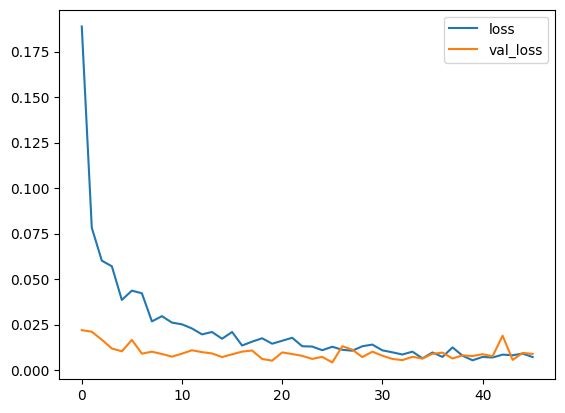

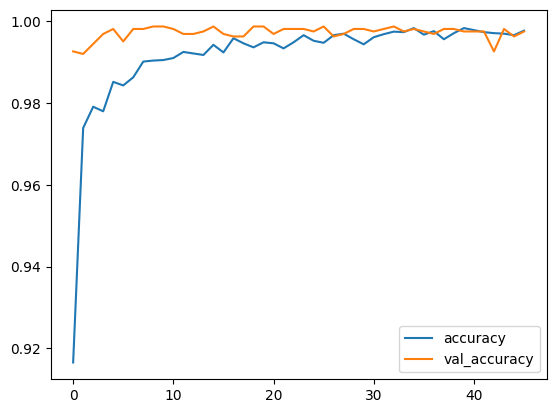

In [17]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

#### Comment:
- Model achieves high valid accuracy ~ 99.6% - 99.7%
- Try more models for comparision

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [19]:
#save model
model_final.save(r'D:\Code\Project-ML\Image_Classification\Save_Model_h5\transfer_fish_plasticwaste_densnet201_model.h5')
print('save!!!')

save!!!


In [20]:
model = load_model(r'D:\Code\Project-ML\Image_Classification\Save_Model_h5\transfer_fish_plasticwaste_densnet201_model.h5')

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [24]:
def result(test_image):
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis= 0)
    result = model.predict(test_image)

    # 0 la fish, 1 la plastic, nguong sigmoid = 0.5
    if result[0][0] >= 0.5:
        prediction = 'Fish'
    else:
        prediction = 'PlasticWaste'
    return prediction

In [25]:
train_evaluation= model.evaluate(train_generator)
test_evaluation= model.evaluate(validation_generator)
print('Train Accuracy:', round(train_evaluation[1], 4), 
        '; Train loss:', round(train_evaluation[0], 4))
print('Test Accuracy:', round(test_evaluation[1], 4), 
        '; Test loss:', round(test_evaluation[0], 4))

52/52 [==============================] - 13s 241ms/step - loss: 0.0088 - accuracy: 0.9976
Train Accuracy: 0.9996 ; Train loss: 0.0012
Test Accuracy: 0.9976 ; Test loss: 0.0088


In [26]:
import os 
predict_path= r'D:\Code\Project-ML\Image_Classification\Dataset\single_prediction\\'
list_image= os.listdir(predict_path)

In [27]:
df= pd.DataFrame(columns=['name_file', 'truth', 'predict'])
name_file=[]
truth=[]
predict=[]

In [28]:
for i in range(len(list_image)):
    path= predict_path + list_image[i]
    test_img= image.load_img(path, target_size=[img_width, img_height])
    name_file.append(list_image[i])
    truth.append(list_image[i].split('_')[0])
    predict.append(result(test_img))

df['name_file']= name_file
df['truth']= truth
df['predict']= predict
df.to_csv(r'D:\Code\Project-ML\Computer_Vision\Pre-trained_Model\Densnet201\prediction_fish_and_plasticwaste_densnet201.csv')

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(df['truth'], df['predict'])

array([[50,  0],
       [ 3, 47]], dtype=int64)

In [31]:
print(classification_report(df['truth'], df['predict']))

              precision    recall  f1-score   support

        Fish       0.94      1.00      0.97        50
PlasticWaste       1.00      0.94      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

